In [36]:
# Import packages

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
import scorecardpy as sc
import random as rd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Q1 - Splitting Subsets (<= 12 months vs. > 12 months)

In [21]:
# Read data
# Before reading this data, the possible typo of purpose showing 'X' is removed, so the data here is 988 rather than 1000.
# When running this code, please remember to change the file path to the corresponding one in your working directory.
data = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q1_Data_removetypo')
data.head()

,Duration,Amount,Age,Depends,Installp,Resident,Existcr,Checking,History,Purpose,...,Coapp,Property,Other,housing,Job,Telephone,Foreign,Result,Bad,Good
0,4,1544,42,2,2,1,3,4,4,3,...,1,1,3,2,2,1,1,Good,0,1
1,4,1494,29,2,1,2,1,3,2,0,...,1,1,3,2,2,1,2,Good,0,1
2,4,1503,42,2,2,1,2,4,4,3,...,1,1,3,2,2,1,1,Good,0,1
3,4,3380,37,2,1,1,1,4,4,0,...,1,1,3,2,3,1,1,Good,0,1
4,4,601,23,2,1,3,1,4,2,2,...,1,1,3,1,2,1,1,Good,0,1


In [3]:
# Missing value check
data.isnull().sum()
# There is no missing value in whole dataset.

Duration     0
Amount       0
Age          0
Depends      0
Installp     0
Resident     0
Existcr      0
Checking     0
History      0
Purpose      0
Savings      0
Emploed      0
marital      0
Coapp        0
Property     0
Other        0
housing      0
Job          0
Telephone    0
Foreign      0
Result       0
Bad          0
Good         0
dtype: int64

In [4]:
# Split the dataset based on Duration <= 12 months and > 12 months
data_below12m = data[data['Duration'] <= 12]
data_above12m = data[data['Duration'] > 12]

In [5]:
# Check data size
print(data_below12m.shape)
print(data_above12m.shape)

(358, 23)
(630, 23)


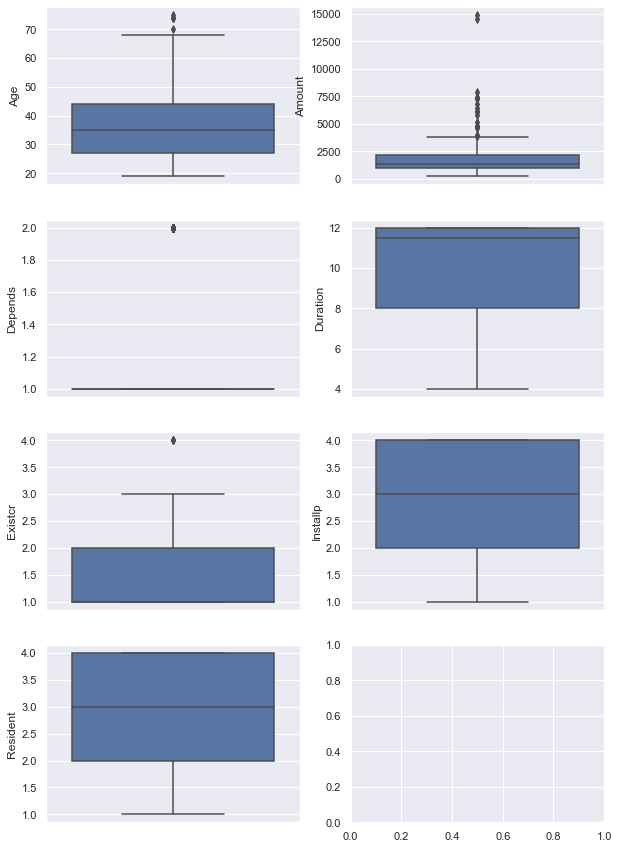

In [6]:
# Boxplot to check outliers for numerical data (<= 12 months)
sns.set()
f, axes = plt.subplots(4, 2, figsize=(10,15))

sns.boxplot(y='Age', data=data_below12m, ax=axes[0,0])
sns.boxplot(y='Amount', data=data_below12m, ax=axes[0,1])
sns.boxplot(y='Depends', data=data_below12m, ax=axes[1,0])
sns.boxplot(y='Duration', data=data_below12m, ax=axes[1,1])
sns.boxplot(y='Existcr', data=data_below12m, ax=axes[2,0])
sns.boxplot(y='Installp', data=data_below12m, ax=axes[2,1])
sns.boxplot(y='Resident', data=data_below12m, ax=axes[3,0])

In [7]:
# Statistical summary (<= 12 months)
data_below12m.describe()

,Duration,Amount,Age,Depends,Installp,Resident,Existcr,Checking,History,Purpose,...,marital,Coapp,Property,Other,housing,Job,Telephone,Foreign,Bad,Good
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,9.860335,1813.251397,36.692737,1.181564,2.829609,2.759777,1.385475,2.645251,2.581006,2.449721,...,2.684358,1.153631,2.000000,2.762570,1.871508,2.740223,1.287709,1.078212,0.212291,0.787709
std,2.525509,1562.117583,12.343610,0.386024,1.174670,1.116894,0.609919,1.247908,1.057388,2.364890,...,0.728246,0.498036,1.034422,0.628052,0.491067,0.667032,0.453329,0.268881,0.409502,0.409502
min,4.000000,250.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,8.000000,963.250000,27.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,...,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,11.500000,1387.000000,35.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,12.000000,2132.750000,44.000000,1.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000
max,12.000000,14896.000000,75.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [8]:
# Print outlier range for different variables and remove them from Exel directly (<= 12 months)

# Age
Age_IQR = data_below12m.describe()['Age'][6]-data_below12m.describe()['Age'][4]
Age_L = data_below12m.describe()['Age'][4]-1.5*Age_IQR
Age_H = data_below12m.describe()['Age'][6]+1.5*Age_IQR
print('<=12m Age:', Age_L, '//', Age_H)

# Amount
Amount_IQR = data_below12m.describe()['Amount'][6]-data_below12m.describe()['Amount'][4]
Amount_L = data_below12m.describe()['Amount'][4]-1.5*Amount_IQR
Amount_H = data_below12m.describe()['Amount'][6]+1.5*Amount_IQR
print('<=12m Amount:', Amount_L, '//', Amount_H)

# Existcr
Existcr_IQR = data_below12m.describe()['Existcr'][6]-data_below12m.describe()['Existcr'][4]
Existcr_L = data_below12m.describe()['Existcr'][4]-1.5*Existcr_IQR
Existcr_H = data_below12m.describe()['Existcr'][6]+1.5*Existcr_IQR
print('<=12m Existcr:', Existcr_L, '//', Existcr_H)

<=12m Age: 1.5 // 69.5
<=12m Amount: -791.0 // 3887.0
<=12m Existcr: -0.5 // 3.5


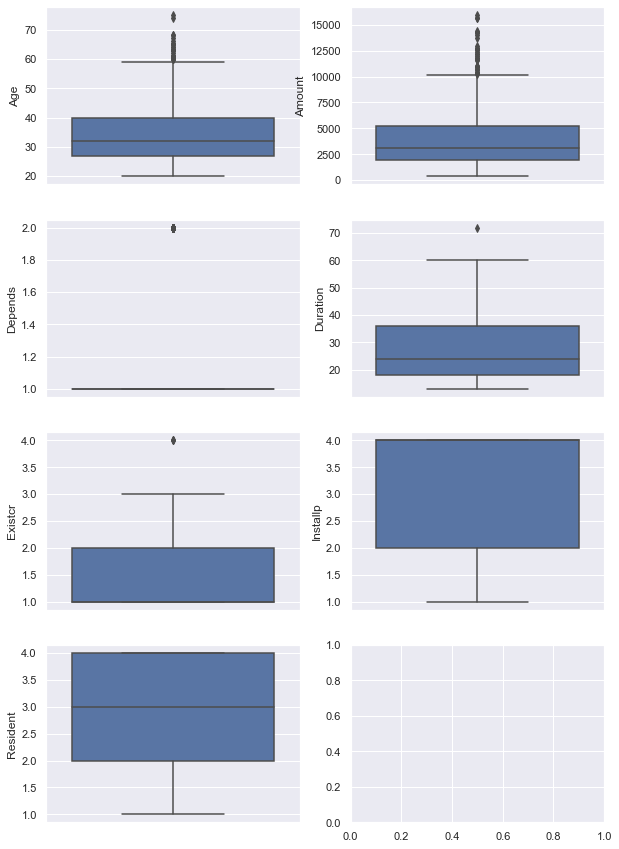

In [9]:
# Boxplot to check outliers for numerical data (> 12 months)
sns.set()
f, axes = plt.subplots(4, 2, figsize=(10,15))

sns.boxplot(y='Age', data=data_above12m, ax=axes[0,0])
sns.boxplot(y='Amount', data=data_above12m, ax=axes[0,1])
sns.boxplot(y='Depends', data=data_above12m, ax=axes[1,0])
sns.boxplot(y='Duration', data=data_above12m, ax=axes[1,1])
sns.boxplot(y='Existcr', data=data_above12m, ax=axes[2,0])
sns.boxplot(y='Installp', data=data_above12m, ax=axes[2,1])
sns.boxplot(y='Resident', data=data_above12m, ax=axes[3,0])

In [10]:
# Statistical summary (> 12 months)
data_above12m.describe()

,Duration,Amount,Age,Depends,Installp,Resident,Existcr,Checking,History,Purpose,...,marital,Coapp,Property,Other,housing,Job,Telephone,Foreign,Bad,Good
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,26.960317,4005.717460,34.811111,1.139683,3.060317,2.885714,1.417460,2.552381,2.528571,2.906349,...,2.682540,1.133333,2.546032,2.642857,1.953968,2.985714,1.460317,1.012698,0.347619,0.652381
std,10.702511,2898.444525,10.730587,0.346933,1.080031,1.099047,0.559934,1.265773,1.094128,2.778373,...,0.698064,0.459488,1.004097,0.727217,0.549121,0.616250,0.498819,0.112058,0.476593,0.476593
min,13.000000,392.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,18.000000,1925.500000,27.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,24.000000,3078.000000,32.000000,1.000000,4.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,36.000000,5223.000000,40.000000,1.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000
max,72.000000,15945.000000,75.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [11]:
# Print outlier range for different variables and remove them from Exel directly (> 12 months)

# Age
Age_IQR = data_above12m.describe()['Age'][6]-data_above12m.describe()['Age'][4]
Age_L = data_above12m.describe()['Age'][4]-1.5*Age_IQR
Age_H = data_above12m.describe()['Age'][6]+1.5*Age_IQR
print('>12m Age:', Age_L, '//', Age_H)

# Amount
Amount_IQR = data_above12m.describe()['Amount'][6]-data_above12m.describe()['Amount'][4]
Amount_L = data_above12m.describe()['Amount'][4]-1.5*Amount_IQR
Amount_H = data_above12m.describe()['Amount'][6]+1.5*Amount_IQR
print('>12m Amount:', Amount_L, '//', Amount_H)

# Existcr
Existcr_IQR = data_above12m.describe()['Existcr'][6]-data_above12m.describe()['Existcr'][4]
Existcr_L = data_above12m.describe()['Existcr'][4]-1.5*Existcr_IQR
Existcr_H = data_above12m.describe()['Existcr'][6]+1.5*Existcr_IQR
print('>12m Existcr:', Existcr_L, '//', Existcr_H)

# Duration
Duration_IQR = data_above12m.describe()['Duration'][6]-data_above12m.describe()['Duration'][4]
Duration_L = data_above12m.describe()['Duration'][4]-1.5*Duration_IQR
Duration_H = data_above12m.describe()['Duration'][6]+1.5*Duration_IQR
print('>12m Duration:', Duration_L, '//', Duration_H)

>12m Age: 7.5 // 59.5
>12m Amount: -3020.75 // 10169.25
>12m Existcr: -0.5 // 3.5
>12m Duration: -9.0 // 63.0


In [20]:
# Read data which is excluded outliers
# When running this code, please remember to change the file path to the corresponding one in your working directory.
data_r = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q1_Data_cleaned')

In [13]:
# Split the data again after removing outliers
data_r_b12m = data_r[data_r['Duration'] <= 12]
data_r_a12m = data_r[data_r['Duration'] > 12]

In [14]:
# Check data size
print(data_r_b12m.shape)
print(data_r_a12m.shape)

(332, 23)
(569, 23)


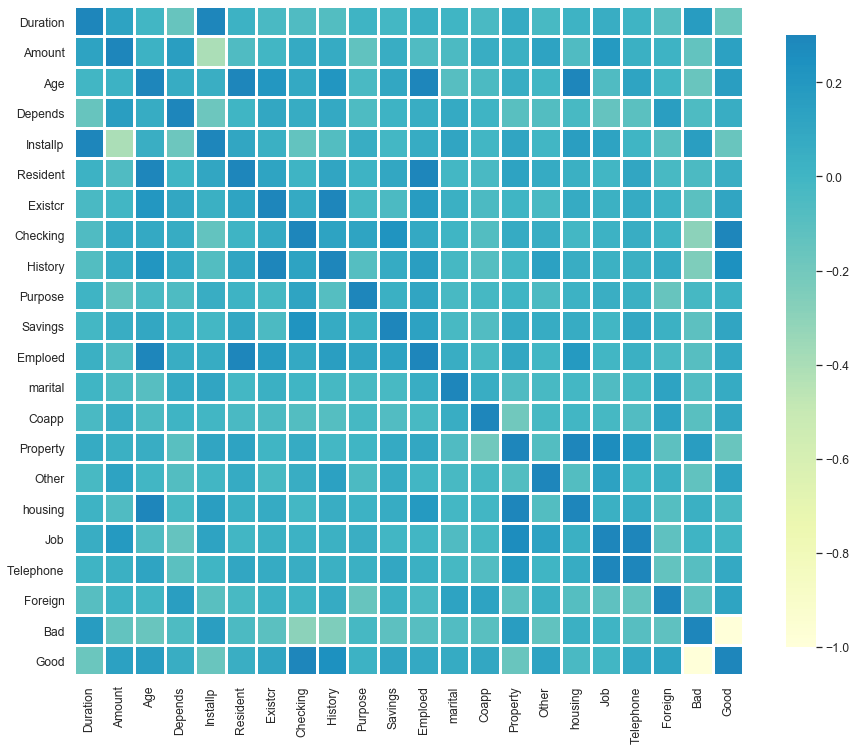

In [15]:
# Utitlize heatmap to check correlation between different variables (<= 12 months)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,15))  

data_r_b12m_corr = data_r_b12m.corr()
sns.heatmap(data_r_b12m_corr, 
            cmap="YlGnBu", center=0, square=True, linewidths=2, linecolor='white',
            vmax = 0.3, cbar_kws={"shrink": .75})
# data_r_b12m_corr
# Only 2 stronger correlations are found, but the ratio is still not high
# History vs Existcr: 0.56 correlation
# Installp vs Amount: -0.40 correlation

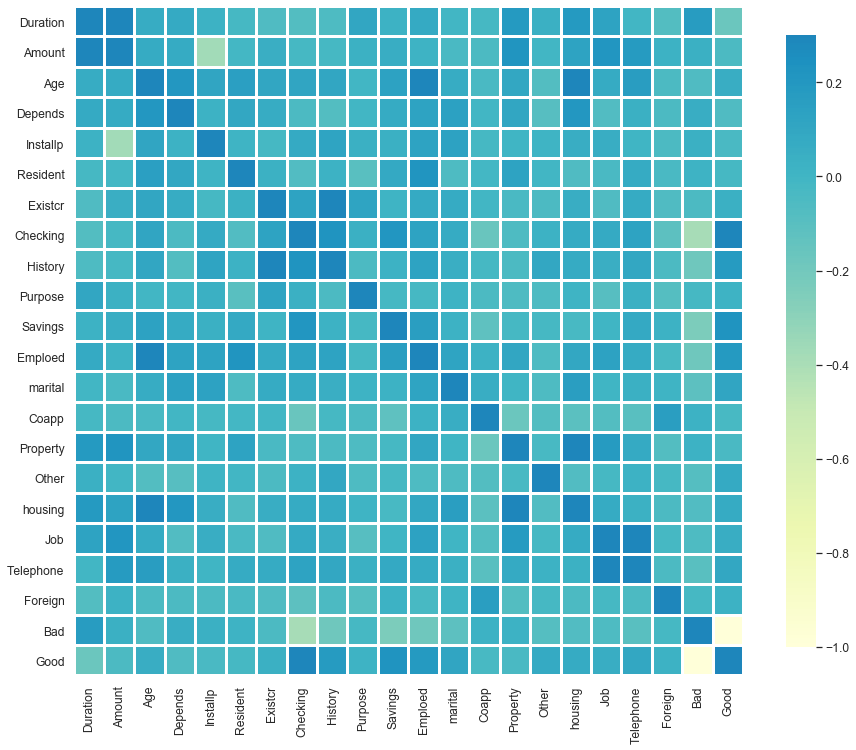

In [16]:
# Utitlize heatmap to check correlation between different variables (> 12 months)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,15))  

data_r_a12m_corr = data_r_a12m.corr()
sns.heatmap(data_r_a12m_corr, 
            cmap="YlGnBu", center=0, square=True, linewidths=2, linecolor='white',
            vmax = 0.3, cbar_kws={"shrink": .75})
# data_r_a12m_corr
# Only 1 stronger correlations are found, but the ratio is still not high
# Duration vs Amount: 0.54 correlation

## Q2 - Splitting Training and Validation Dataset

In [17]:
data_r_b12m = shuffle(data_r_b12m)
data_r_a12m = shuffle(data_r_a12m)

In [18]:
# Split training and validation data based on 70% and 30% (the default of this sc.split_df function is 70% and 30%)
Train_12b, Test_12b = sc.split_df(data_r_b12m, 'Result').values()
Train_12a, Test_12a = sc.split_df(data_r_a12m, 'Result').values()

## Q3 - Variable Selection

[INFO] creating woe binning ...


C:\Users\Nieh\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "Result" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


{'Resident': <Figure size 432x288 with 2 Axes>,
 'Foreign': <Figure size 432x288 with 2 Axes>,
 'Property': <Figure size 432x288 with 2 Axes>,
 'Coapp': <Figure size 432x288 with 2 Axes>,
 'History': <Figure size 432x288 with 2 Axes>,
 'Purpose': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'Other': <Figure size 432x288 with 2 Axes>,
 'Depends': <Figure size 432x288 with 2 Axes>,
 'Amount': <Figure size 432x288 with 2 Axes>,
 'Job': <Figure size 432x288 with 2 Axes>,
 'Telephone': <Figure size 432x288 with 2 Axes>,
 'Checking': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Savings': <Figure size 432x288 with 2 Axes>,
 'marital': <Figure size 432x288 with 2 Axes>,
 'Installp': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'Emploed': <Figure size 432x288 with 2 Axes>,
 'Existcr': <Figure size 432x288 with 2 Axes>}

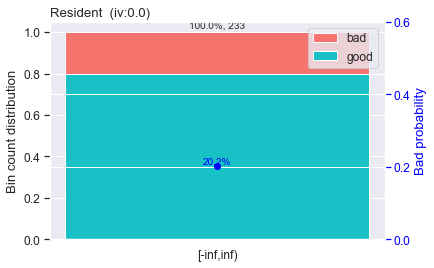

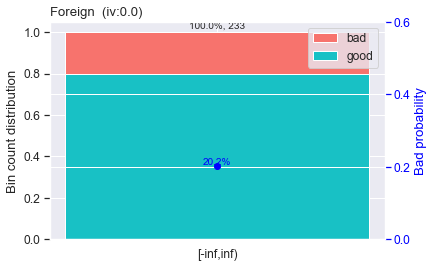

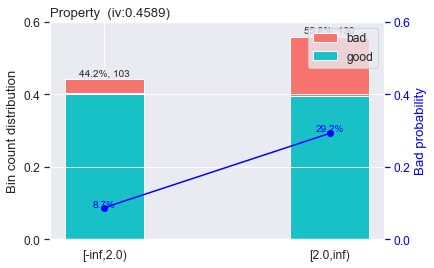

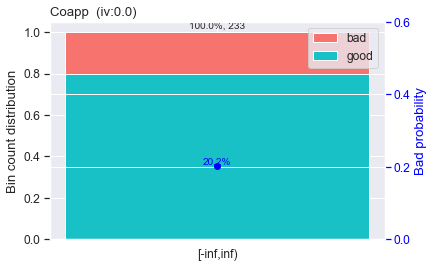

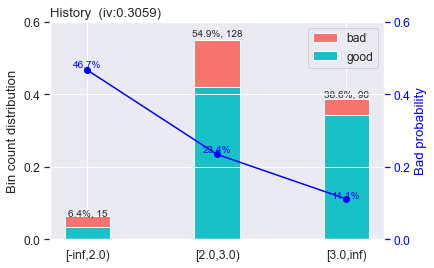

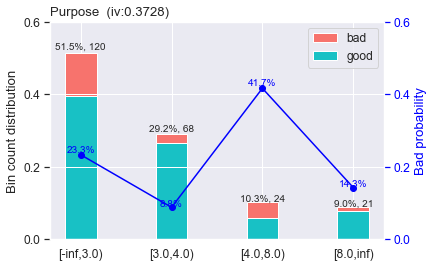

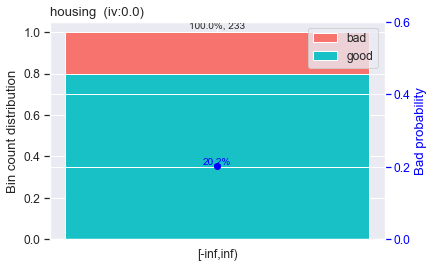

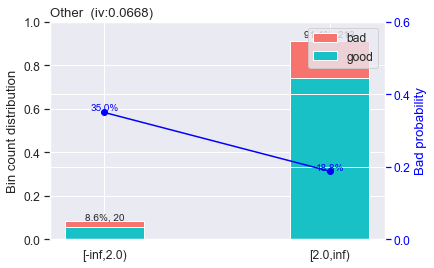

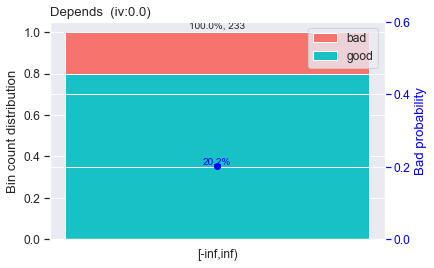

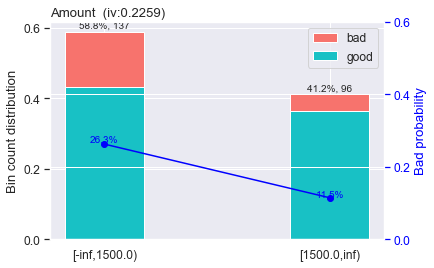

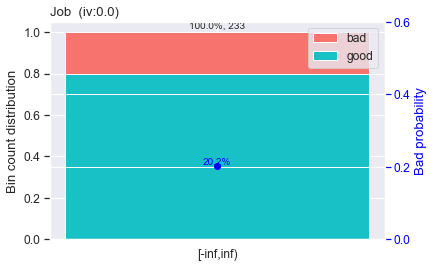

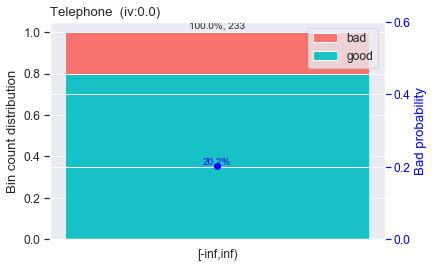

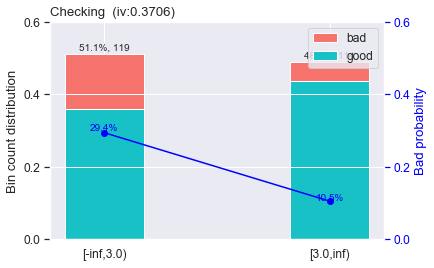

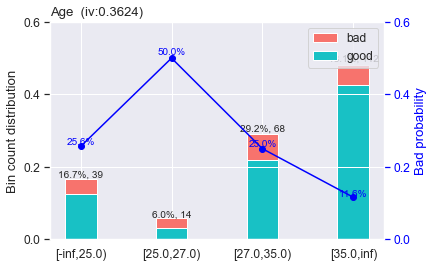

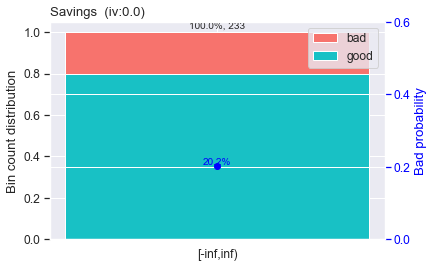

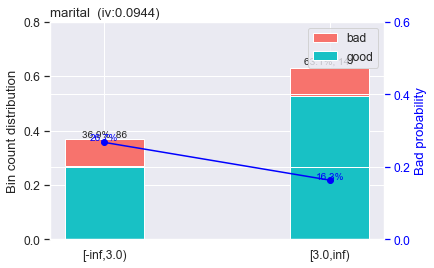

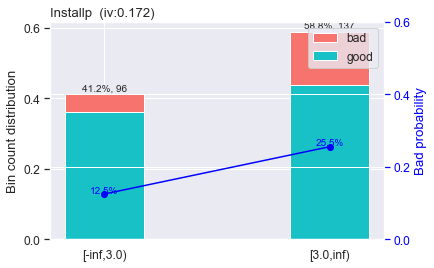

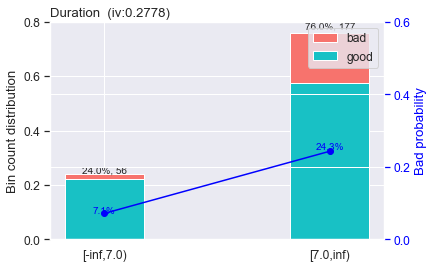

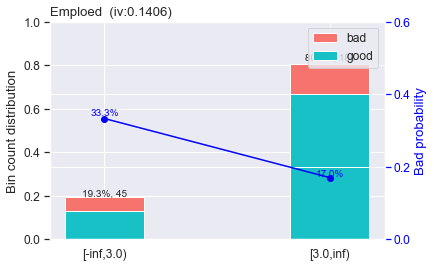

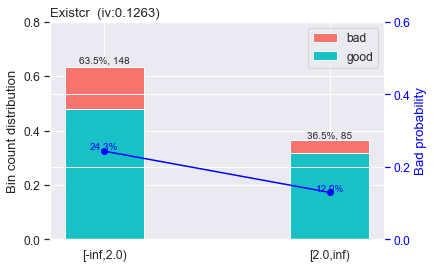

In [58]:
# Check information values for different variables to decide which 4 are suitable for model training (<= 12 months)
woe_train_12b = sc.woebin(Train_12b.iloc[:, 0:21], y="Result", method='chimerge')
sc.woebin_plot(woe_train_12b)

[INFO] creating woe binning ...


C:\Users\Nieh\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "Result" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


Binning on 398 rows and 21 columns in 00:00:13


{'Resident': <Figure size 432x288 with 2 Axes>,
 'Foreign': <Figure size 432x288 with 2 Axes>,
 'Property': <Figure size 432x288 with 2 Axes>,
 'Coapp': <Figure size 432x288 with 2 Axes>,
 'History': <Figure size 432x288 with 2 Axes>,
 'Purpose': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'Other': <Figure size 432x288 with 2 Axes>,
 'Depends': <Figure size 432x288 with 2 Axes>,
 'Amount': <Figure size 432x288 with 2 Axes>,
 'Job': <Figure size 432x288 with 2 Axes>,
 'Telephone': <Figure size 432x288 with 2 Axes>,
 'Checking': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Savings': <Figure size 432x288 with 2 Axes>,
 'marital': <Figure size 432x288 with 2 Axes>,
 'Installp': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'Emploed': <Figure size 432x288 with 2 Axes>,
 'Existcr': <Figure size 432x288 with 2 Axes>}

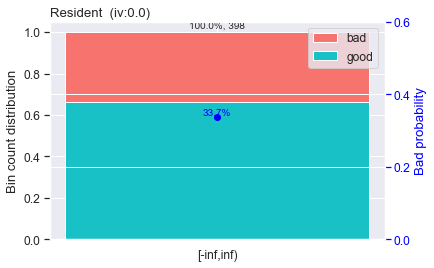

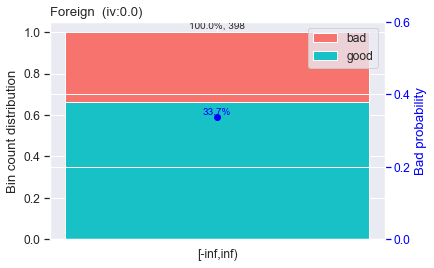

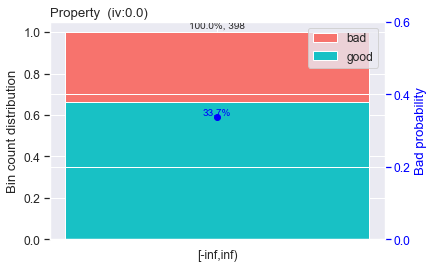

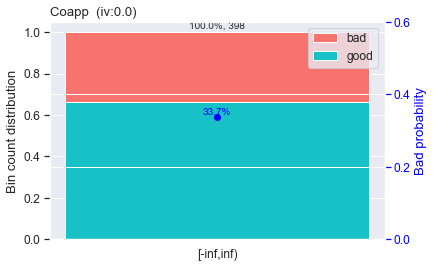

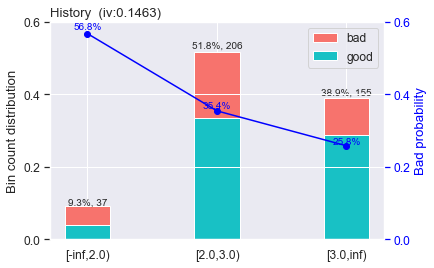

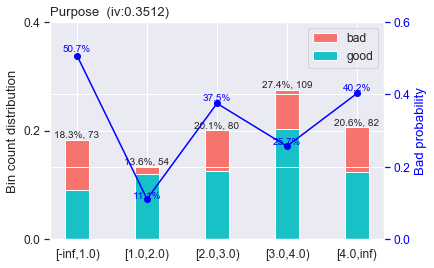

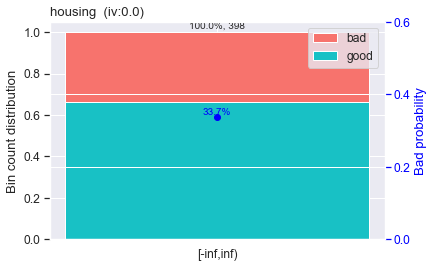

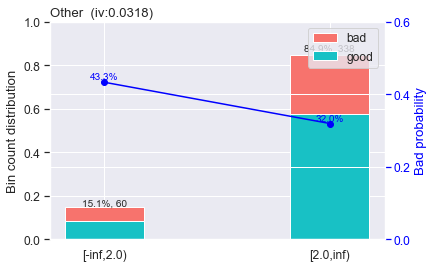

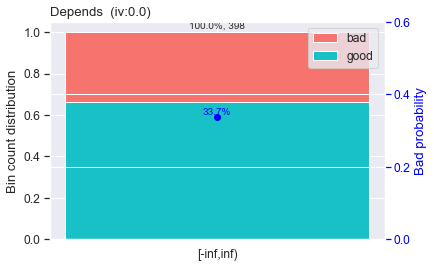

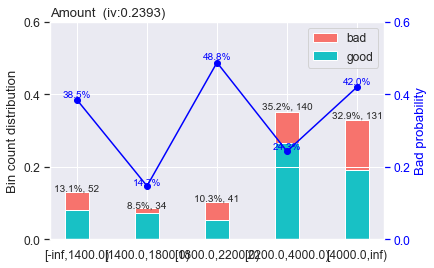

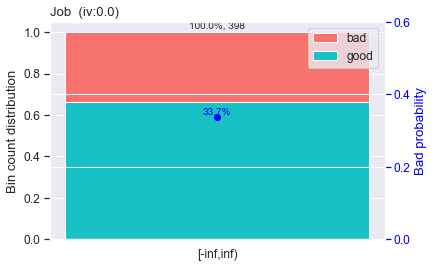

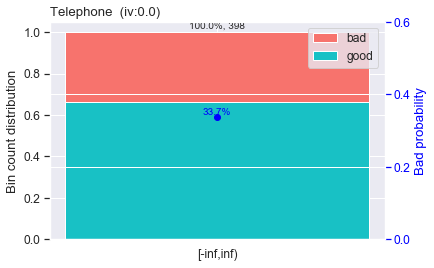

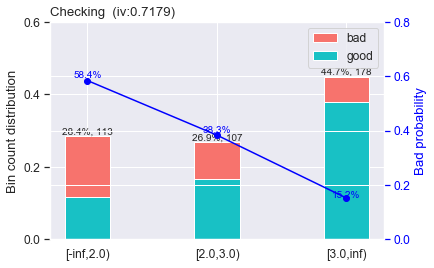

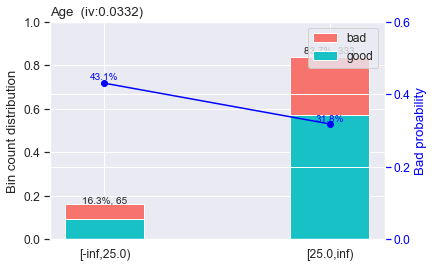

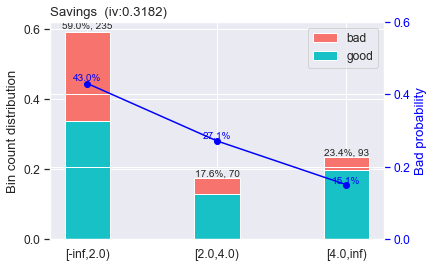

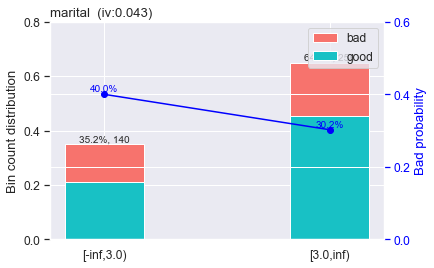

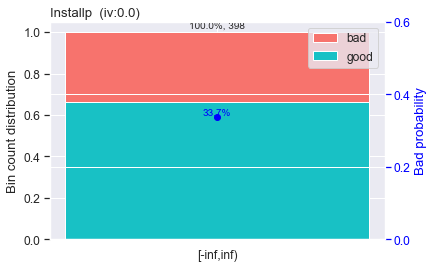

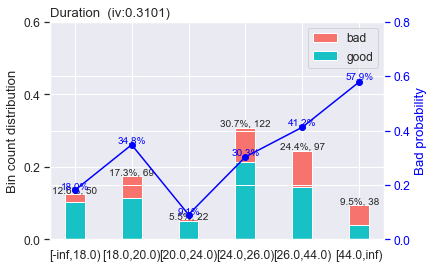

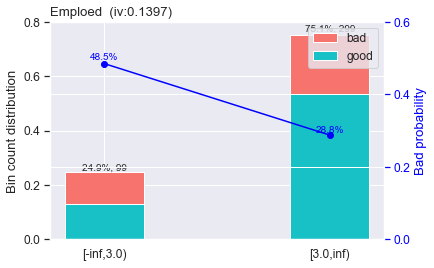

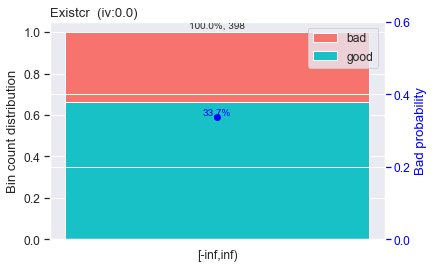

In [85]:
# Check information values for different variables to decide which 4 are suitable for model training (> 12 months)
woe_train_12a = sc.woebin(Train_12a.iloc[:, 0:21], y="Result", method='chimerge')
sc.woebin_plot(woe_train_12a)

In [ ]:
# Save training and validation data for later using in Excel.

# Train_12b.to_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\train_b12m.xlsx')
# Test_12b.to_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\test_b12m.xlsx')
# Train_12a.to_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\train_a12m.xlsx')
# Test_12a.to_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\test_a12m.xlsx')

## Q4 - Model Training

### <= 12 months, Logistic regression - Binary variable from Excel 
- After selecting 4 variables from above process, calculate chi-square in Excel for different binning ways of each variable.
- Choose the best binning ways and transfer data into binary variables in Excel.

In [43]:
# Read data - binary variables in Excel
# When running this code, please remember to change the file path to the corresponding one in your working directory.
data_train_12b = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q4_binary_train_b12m')
data_test_12b = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q4_binary_test_b12m')
data_train_12b.head()

,Age_<=30,Age_31-45,Age_46-60,History_0&1,History_2,History_3,Checking_1,Checking_2,Checking3,Property_1,Property_2,Property_3,Good
0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,1,0,0,1
4,0,1,0,0,1,0,0,0,1,1,0,0,1


In [44]:
# Separate independent variables(x) and dependent variabls(y)
train_b12_b_x = data_train_12b.iloc[:, 0:12]
train_b12_b_y = data_train_12b.iloc[:, 12]

test_b12_b_x = data_test_12b.iloc[:, 0:12]
test_b12_b_y = data_test_12b.iloc[:, 12]

In [45]:
# Load logistic regression model for <= 12 month datset
logistic_r_b = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
logistic_r_b.fit(train_b12_b_x, train_b12_b_y)

print('Coefficient: ', logistic_r_b.coef_)
print('Intercept: ', logistic_r_b.intercept_)

Coefficient:  [[-0.78204034  0.          0.         -1.49375242 -0.35321407  0.
  -1.45214454 -0.43997325 -0.52207891  0.53350386  0.06501931 -0.04630775]]
Intercept:  [2.49922584]


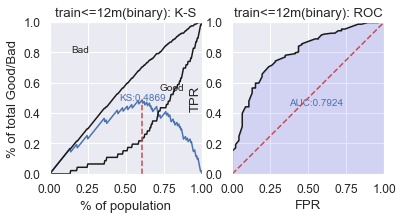

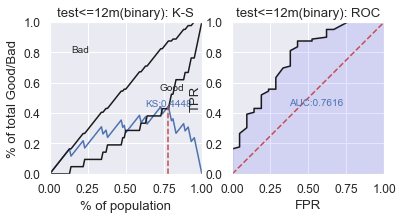

In [55]:
# Prediction from logistic regression model
train_pred_12b_b = logistic_r_b.predict_proba(train_b12_b_x)[:,1]
test_pred_12b_b = logistic_r_b.predict_proba(test_b12_b_x)[:,1]

# ROC and KS performance
train_perf_12b_b = sc.perf_eva(train_b12_b_y, train_pred_12b_b, title = "train<=12m(binary)")
test_perf_12b_b = sc.perf_eva(test_b12_b_y, test_pred_12b_b, title = "test<=12m(binary)")

### <= 12 months, Logistic regression - Python scorecardpy package
- After selecting 4 variables from above process, calculate chi-square in Excel for different binning ways of each variable.
- Choose the best binning way and assign preferred binning way into Python scorecardpy package.

In [64]:
# Select 4 variables for <= 12 month dataset
Train_12b_s = Train_12b[['Age','History','Checking','Property','Good']]
Test_12b_s = Test_12b[['Age','History','Checking','Property','Good']]

In [65]:
# Manual binning for 4 variables
breaks_adj = {
              'Age': [30, 45, 60],
              'History': [0, 2, 3, 4],
              'Checking': [1, 2, 3, 4],
              'Property': [1, 2, 3, 4]
              }
bins_adj_12b = sc.woebin(Train_12b_s, y="Good", breaks_list=breaks_adj)

[INFO] creating woe binning ...


{'Property': <Figure size 432x288 with 2 Axes>,
 'Checking': <Figure size 432x288 with 2 Axes>,
 'History': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>}

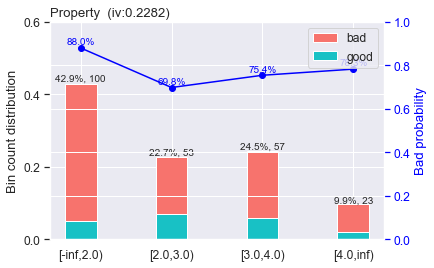

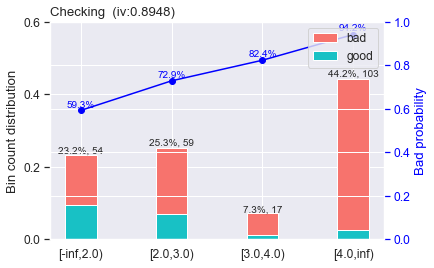

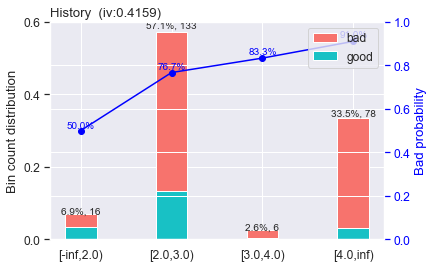

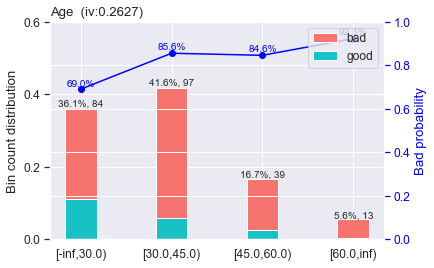

In [66]:
# Plot binning result of selected 4 variables
sc.woebin_plot(bins_adj_12b)

In [67]:
# Transfer original data into weighted data
train_woe_12b = sc.woebin_ply(Train_12b_s, bins_adj_12b)
test_woe_12b = sc.woebin_ply(Test_12b_s, bins_adj_12b)

y_train_12b = train_woe_12b.loc[:,'Good']
X_train_12b = train_woe_12b.loc[:,train_woe_12b.columns != 'Good']
y_test_12b = test_woe_12b.loc[:,'Good']
X_test_12b = test_woe_12b.loc[:,train_woe_12b.columns != 'Good']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [68]:
# Load logistic regression model for <= 12 month datset
logistic_r = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
logistic_r.fit(X_train_12b, y_train_12b)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

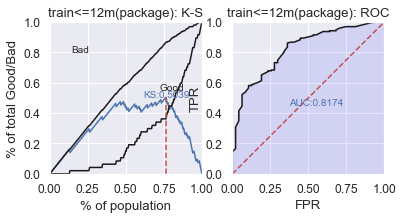

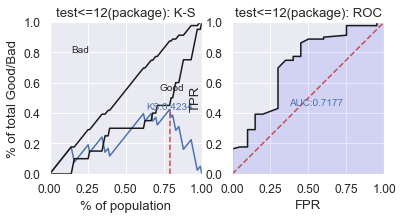

In [69]:
# Prediction from logistic regression model
train_pred_12b = logistic_r.predict_proba(X_train_12b)[:,1]
test_pred_12b = logistic_r.predict_proba(X_test_12b)[:,1]

# ROC and KS performance
train_perf_12b = sc.perf_eva(y_train_12b, train_pred_12b, title = "train<=12m(package)")
test_perf_12b = sc.perf_eva(y_test_12b, test_pred_12b, title = "test<=12(package)")

### > 12 months, Linear regression - Binary variable from Excel 
- After selecting 4 variables from above process, calculate chi-square in Excel for different binning ways of each variable.
- Choose the best binning ways and transfer data into binary variables in Excel.

In [32]:
# Read data - binary variables in Excel
# When running this code, please remember to change the file path to the corresponding one in your working directory.
data_train_12a = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q4_binary_train_a12m')
data_test_12a = pd.read_excel(r'C:\Users\Nieh\Desktop\Credit Risk Scoring\Coursework\German_C1965066.xlsx', 'Q4_binary_test_a12m')
data_train_12a.head()

,Amount_<=2000,Amount_2001-3500,Amount_3501-6000,Checking_1,Checking_2,Checking_3,Purpose_0&6&9,"Purpose_1,2,4",Purpose_3&5&7&8,Savings_1&5,Savings_2,Saving_3,Good
0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,0,0,1,0,0,1,0,1
3,0,1,0,1,0,0,0,1,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1,0,0,1


In [35]:
# Separate independent variables(x) and dependent variabls(y)
train_a12_a_x = data_train_12a.iloc[:, 0:12]
train_a12_a_y = data_train_12a.iloc[:, 12]

test_a12_a_x = data_test_12a.iloc[:, 0:12]
test_a12_a_y = data_test_12a.iloc[:, 12]

In [38]:
# Load linear regression model for > 12 month datset
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(train_a12_a_x, train_a12_a_y)

print('Coefficient: ', linear_r.coef_)
print('Intercept: ', linear_r.intercept_)

Coefficient:  [ 0.01424158  0.02890005  0.06309221 -0.48401615 -0.18390606 -0.0819741
 -0.10630448  0.03800233  0.06830215 -0.28117279 -0.26226549 -0.16579228]
Intercept:  1.0673775674793466


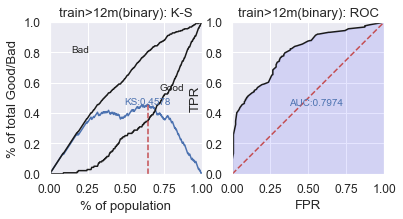

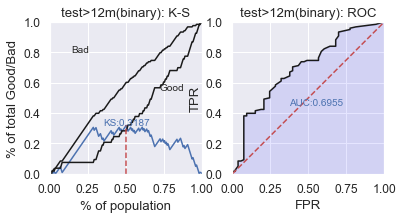

In [70]:
# Prediction from linear regression model
train_pred_12a_a = linear_r.predict(train_a12_a_x)
test_pred_12a_a = linear_r.predict(test_a12_a_x)

# ROC and KS performance
train_perf_12a_a = sc.perf_eva(train_a12_a_y, train_pred_12a_a, title = "train>12m(binary)")
test_perf_12a_a = sc.perf_eva(test_a12_a_y, test_pred_12a_a, title = "test>12m(binary)")